In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from keras.layers import InputLayer, Dense
from keras.optimizers import Adam
from keras.models import Sequential

In [19]:
# !unzip /content/drive/MyDrive/cat_dog.zip

In [3]:
df = pd.read_csv('cat_dog/cat_dog_labels.csv')
df.shape

(697, 2)

In [4]:
df.head()

,filename,label
0,cat_222.jpg,cat
1,cat_386.jpg,cat
2,cat_559.jpg,cat
3,cat_169.jpg,cat
4,cat_208.jpg,cat


In [5]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df.label)
df.sample(6)

,filename,label,label_encoded
290,dog_363.jpg,dog,1
631,dog_522.jpg,dog,1
402,dog_30.jpg,dog,1
579,cat_1.jpg,cat,0
138,cat_64.jpg,cat,0
593,cat_464.jpg,cat,0


In [6]:
X = []
for img in df.filename:
  image = cv2.imread('cat_dog/Images/'+img)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (64, 64))
  X.append(image)

In [7]:
X = np.array(X)
X.shape

(697, 64, 64, 3)

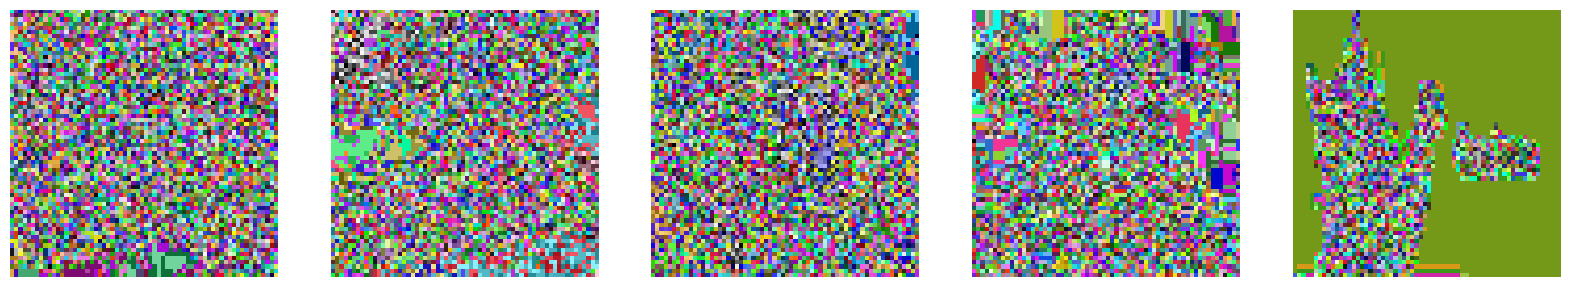

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))
for i in range(5):
  ax[i].imshow(X[i]*100)
  ax[i].axis('off')

In [10]:
X = X.reshape(X.shape[0], 64*64*3)
X.shape

(697, 12288)

In [11]:
X.min(), X.max()

(np.uint8(0), np.uint8(255))

In [13]:
X = X/X.max()
X.min(), X.max()

(np.float64(0.0), np.float64(1.0))

In [14]:
y = df['label_encoded']
y.shape

(697,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((557, 12288), (557,), (140, 12288), (140,))

In [101]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.initializers import random_normal, glorot_normal, he_normal

In [118]:
model = Sequential()
model.add(InputLayer(shape=(X.shape[1], )))
model.add(Dense(units=100, activation='relu', kernel_initializer=he_normal(seed=42)))
model.add(Dense(units=100, activation='relu', kernel_initializer=he_normal(seed=42)))
model.add(Dense(units=100, activation='relu', kernel_initializer=he_normal(seed=42)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 100)            │     1,228,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,249,201 (4.77 MB)

 Trainable params: 1,249,201 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [119]:
adam = Adam(learning_rate=1e-5)

In [120]:
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [121]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5626 - loss: 0.6806 - val_accuracy: 0.4429 - val_loss: 0.7298
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5679 - loss: 0.6823 - val_accuracy: 0.4643 - val_loss: 0.7170
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5811 - loss: 0.6619 - val_accuracy: 0.4929 - val_loss: 0.7162
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5997 - loss: 0.6587 - val_accuracy: 0.4500 - val_loss: 0.7148
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6713 - loss: 0.6372 - val_accuracy: 0.4786 - val_loss: 0.7147
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6664 - loss: 0.6323 - val_accuracy: 0.4857 - val_loss: 0.7188
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6893 - loss: 0.6196 - val_accuracy: 0.4786 - val_loss: 0.7247
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6768 - loss: 0.6239 - val_accuracy: 0.5000 - v

In [122]:
predictions = model.predict(X_test)
predictions = predictions.astype(int)
accuracy_score(y_test, predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


0.5071428571428571

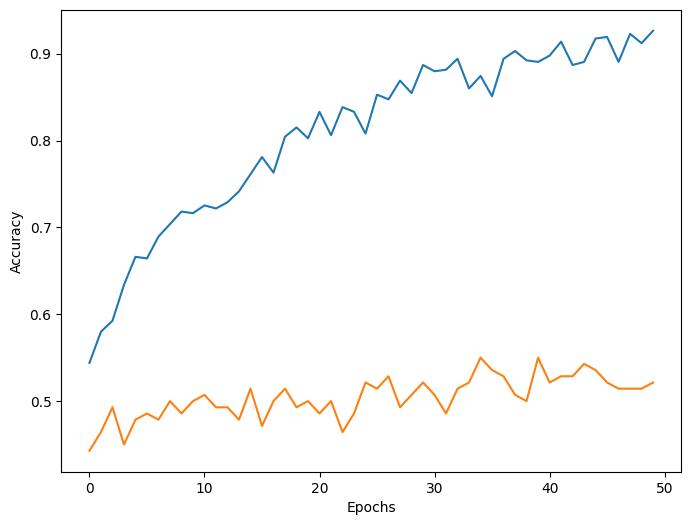

In [123]:
plt.figure(figsize=(8, 6))
plt.plot(model_history.history['accuracy'], label='training set')
plt.plot(model_history.history['val_accuracy'], label='validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

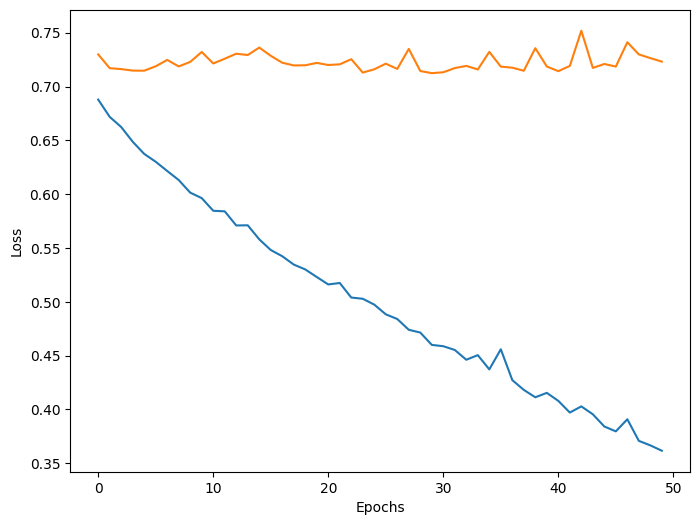

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(model_history.history['loss'], label='training set')
plt.plot(model_history.history['val_loss'], label='validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()